In [1]:
def huffman_decoding(encoded_data, codebook):
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded_data = []
    current_code = ""

    for bit in encoded_data:
        current_code += bit
        if current_code in reverse_codebook:
            decoded_data.append(reverse_codebook[current_code])
            current_code = ""

    return ''.join(decoded_data)


In [2]:
def wac_decoding(encoded_data, codebook):
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded_data = []
    current_code = ""

    for bit in encoded_data:
        current_code += bit
        if current_code in reverse_codebook:
            decoded_data.append(reverse_codebook[current_code])
            current_code = ""

    return ''.join(decoded_data)


    Dataset Size Dataset Type  Huffman Compression Ratio  \
0            100         Text                     4.4200   
1            100          DNA                     2.0000   
2            100          Log                     5.0100   
3            500         Text                     4.7520   
4            500          DNA                     2.0000   
5            500          Log                     5.2300   
6           1000         Text                     4.7770   
7           1000          DNA                     2.0000   
8           1000          Log                     5.2530   
9           5000         Text                     4.8008   
10          5000          DNA                     2.0000   
11          5000          Log                     5.2788   
12         10000         Text                     4.8016   
13         10000          DNA                     2.0000   
14         10000          Log                     5.2996   

    Huffman Encoding Time  Huffman Deco

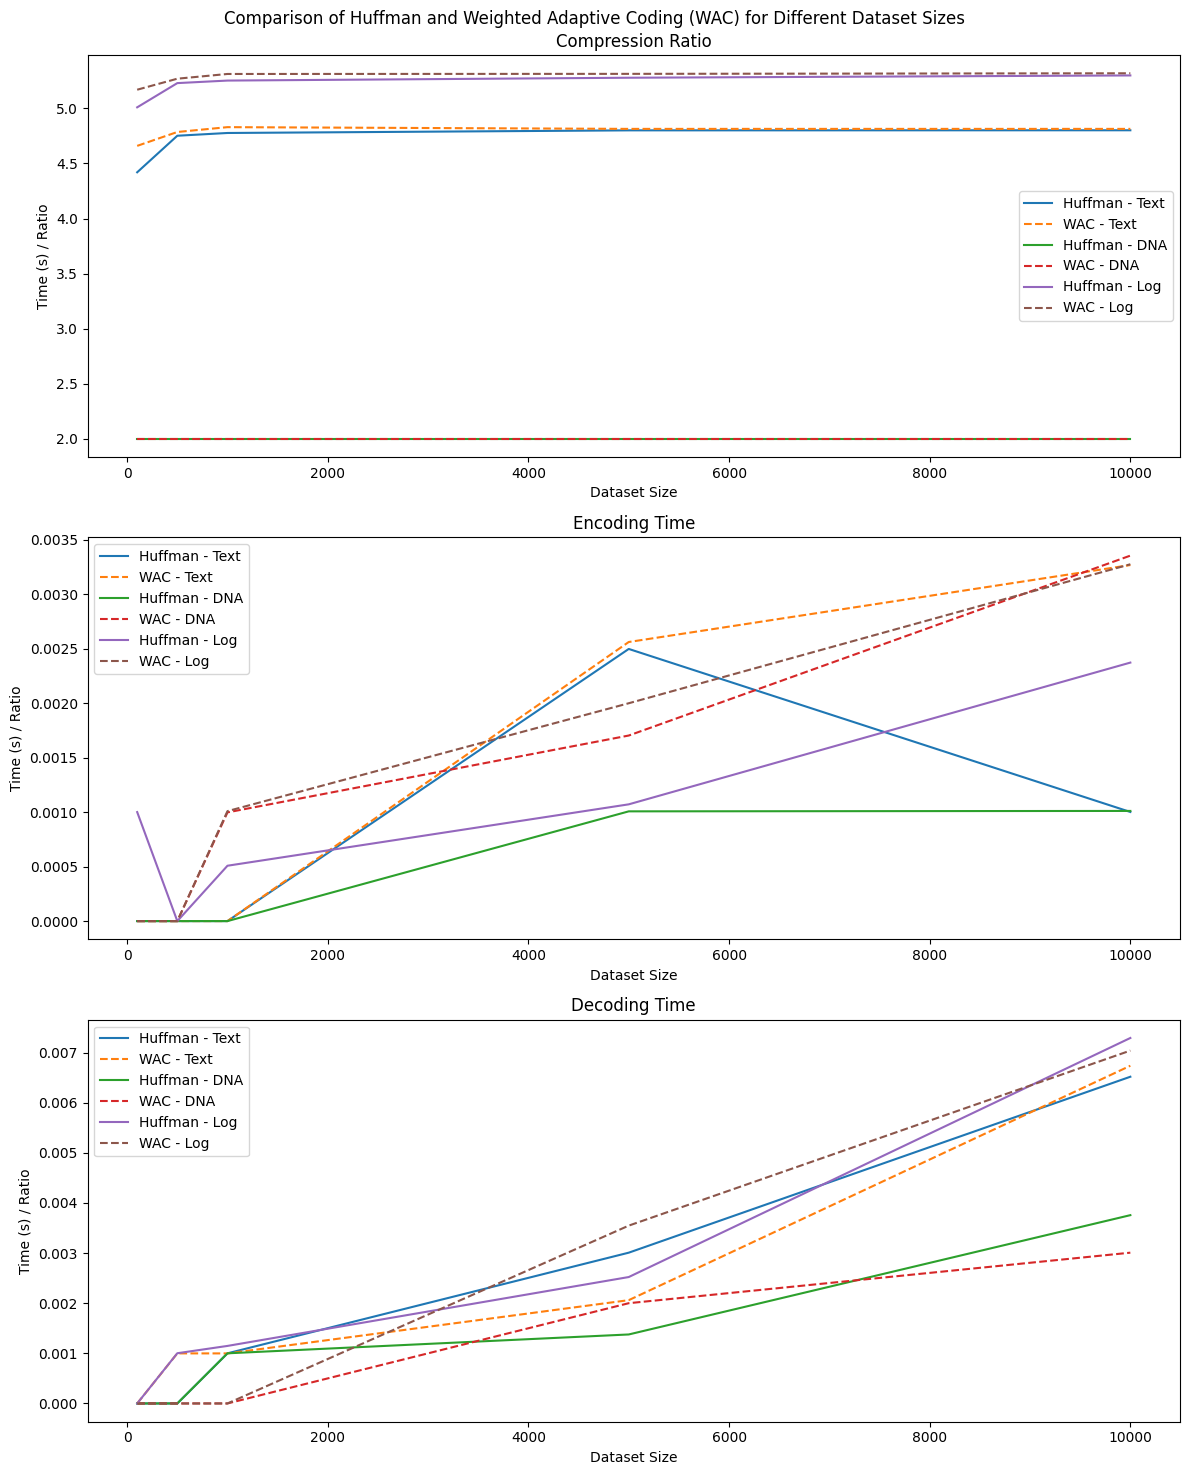

,Dataset Size,Dataset Type,Huffman Compression Ratio,Huffman Encoding Time,Huffman Decoding Time,WAC Compression Ratio,WAC Encoding Time,WAC Decoding Time
0,100,Text,4.4200,0.000000,0.000000,4.6600,0.000000,0.000000
1,100,DNA,2.0000,0.000000,0.000000,2.0000,0.000000,0.000000
2,100,Log,5.0100,0.001000,0.000000,5.1700,0.000000,0.000000
3,500,Text,4.7520,0.000000,0.000000,4.7860,0.000000,0.000999
4,500,DNA,2.0000,0.000000,0.000000,2.0000,0.000000,0.000000
5,500,Log,5.2300,0.000000,0.001002,5.2700,0.000000,0.000000
6,1000,Text,4.7770,0.000000,0.001000,4.8300,0.000000,0.000998
7,1000,DNA,2.0000,0.000000,0.001000,2.0000,0.000997,0.000000
8,1000,Log,5.2530,0.000508,0.001148,5.3130,0.001009,0.000000
9,5000,Text,4.8008,0.002496,0.003009,4.8142,0.002560,0.002061


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import string
import heapq
from collections import defaultdict

# Huffman Node Class
class HuffmanNode:
    def __init__(self, symbol=None, frequency=0):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

# WAC Node Class
class WACNode:
    def __init__(self, symbol=None, frequency=0):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

# Function to build Huffman Tree
def build_huffman_tree(frequencies):
    heap = [HuffmanNode(symbol, freq) for symbol, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(frequency=left.frequency + right.frequency)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

# Function to assign codes for Huffman
def assign_codes(node, prefix="", codebook=None):
    if codebook is None:
        codebook = {}

    if node.symbol is not None:
        codebook[node.symbol] = prefix
    else:
        assign_codes(node.left, prefix + "0", codebook)
        assign_codes(node.right, prefix + "1", codebook)

    return codebook

# Huffman Encoding Function
def huffman_encoding(data):
    if not data:
        return "", {}

    frequencies = defaultdict(int)
    for symbol in data:
        frequencies[symbol] += 1

    huffman_tree = build_huffman_tree(frequencies)
    codebook = assign_codes(huffman_tree)

    encoded_data = ''.join(codebook[symbol] for symbol in data)
    return encoded_data, codebook

# Huffman Decoding Function
def huffman_decoding(encoded_data, codebook):
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded_data = []
    current_code = ""

    for bit in encoded_data:
        current_code += bit
        if current_code in reverse_codebook:
            decoded_data.append(reverse_codebook[current_code])
            current_code = ""

    return ''.join(decoded_data)

# Function to build WAC Tree
def build_wac_tree(symbols, weights):
    heap = [WACNode(symbol, weights[symbol][0]) for symbol in symbols]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = WACNode(frequency=left.frequency + right.frequency)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

# Function to assign codes for WAC
def assign_wac_codes(node, prefix="", codebook=None):
    if codebook is None:
        codebook = {}

    if node.symbol is not None:
        codebook[node.symbol] = prefix
    else:
        assign_wac_codes(node.left, prefix + "0", codebook)
        assign_wac_codes(node.right, prefix + "1", codebook)

    return codebook

# Weighted Adaptive Coding Function
def weighted_adaptive_coding(data):
    if not data:
        return "", {}

    symbols = set(data)
    weights = {symbol: [1] for symbol in symbols}  # Initial weights can be set to 1

    # Update weights based on position
    for i, symbol in enumerate(data):
        weights[symbol].append(weights[symbol][-1] + (len(data) - i))

    wac_tree = build_wac_tree(symbols, weights)
    codebook = assign_wac_codes(wac_tree)

    encoded_data = ''.join(codebook[symbol] for symbol in data)
    return encoded_data, codebook

# WAC Decoding Function
def wac_decoding(encoded_data, codebook):
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded_data = []
    current_code = ""

    for bit in encoded_data:
        current_code += bit
        if current_code in reverse_codebook:
            decoded_data.append(reverse_codebook[current_code])
            current_code = ""

    return ''.join(decoded_data)

# Function to generate datasets of different sizes
def generate_datasets(sizes):
    datasets = {}
    for size in sizes:
        # Generate a random text dataset
        text_data = ''.join(random.choices(string.ascii_lowercase + ' ', k=size))
        # Generate a random DNA sequence dataset
        dna_data = ''.join(random.choices('ACGT', k=size))
        # Generate a random log file dataset
        log_data = ''.join(random.choices(string.ascii_uppercase + string.digits + ' -', k=size))
        datasets[size] = {"Text": text_data, "DNA": dna_data, "Log": log_data}
    return datasets

# Function to run experiments on datasets of different sizes
def run_experiments(sizes):
    datasets = generate_datasets(sizes)
    results = []

    for size, data_dict in datasets.items():
        for name, data in data_dict.items():
            # Huffman encoding
            start_time = time.time()
            huffman_encoded_data, huffman_codebook = huffman_encoding(data)
            huffman_encoding_time = time.time() - start_time

            # Huffman decoding (for verification)
            start_time = time.time()
            huffman_decoded_data = huffman_decoding(huffman_encoded_data, huffman_codebook)
            huffman_decoding_time = time.time() - start_time

            # WAC encoding
            start_time = time.time()
            wac_encoded_data, wac_codebook = weighted_adaptive_coding(data)
            wac_encoding_time = time.time() - start_time

            # WAC decoding (for verification)
            start_time = time.time()
            wac_decoded_data = wac_decoding(wac_encoded_data, wac_codebook)
            wac_decoding_time = time.time() - start_time

            # Record results
            results.append({
                "Dataset Size": size,
                "Dataset Type": name,
                "Huffman Compression Ratio": len(huffman_encoded_data) / len(data),
                "Huffman Encoding Time": huffman_encoding_time,
                "Huffman Decoding Time": huffman_decoding_time,
                "WAC Compression Ratio": len(wac_encoded_data) / len(data),
                "WAC Encoding Time": wac_encoding_time,
                "WAC Decoding Time": wac_decoding_time
            })

    return results

# Define dataset sizes for testing
sizes = [100, 500, 1000, 5000, 10000]

# Run experiments and collect results
results = run_experiments(sizes)

# Convert results to DataFrame
df = pd.DataFrame(results)
print(df)

# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Comparison of Huffman and Weighted Adaptive Coding (WAC) for Different Dataset Sizes')

# Compression Ratios
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[0].plot(subset['Dataset Size'], subset['Huffman Compression Ratio'], label=f'Huffman - {dataset_type}')
    axes[0].plot(subset['Dataset Size'], subset['WAC Compression Ratio'], label=f'WAC - {dataset_type}', linestyle='--')
axes[0].set_title('Compression Ratio')
axes[0].legend()

# Encoding Times
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[1].plot(subset['Dataset Size'], subset['Huffman Encoding Time'], label=f'Huffman - {dataset_type}')
    axes[1].plot(subset['Dataset Size'], subset['WAC Encoding Time'], label=f'WAC - {dataset_type}', linestyle='--')
axes[1].set_title('Encoding Time')
axes[1].legend()

# Decoding Times
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[2].plot(subset['Dataset Size'], subset['Huffman Decoding Time'], label=f'Huffman - {dataset_type}')
    axes[2].plot(subset['Dataset Size'], subset['WAC Decoding Time'], label=f'WAC - {dataset_type}', linestyle='--')
axes[2].set_title('Decoding Time')
axes[2].legend()

# Set common labels
for ax in axes.flat:
    ax.set_xlabel('Dataset Size')
    ax.set_ylabel('Time (s) / Ratio')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

df


      Dataset Size Dataset Type  Huffman Compression Ratio  \
0               10         Text                   3.000000   
1               10          DNA                   2.000000   
2               10          Log                   3.400000   
3               20         Text                   3.850000   
4               20          DNA                   2.000000   
...            ...          ...                        ...   
2992          9980          DNA                   2.000000   
2993          9980          Log                   5.291683   
2994          9990         Text                   4.798599   
2995          9990          DNA                   2.000000   
2996          9990          Log                   5.295295   

      Huffman Encoding Time  Huffman Decoding Time  Huffman Accuracy  \
0                  0.000000               0.000000              True   
1                  0.000000               0.000000              True   
2                  0.000000            

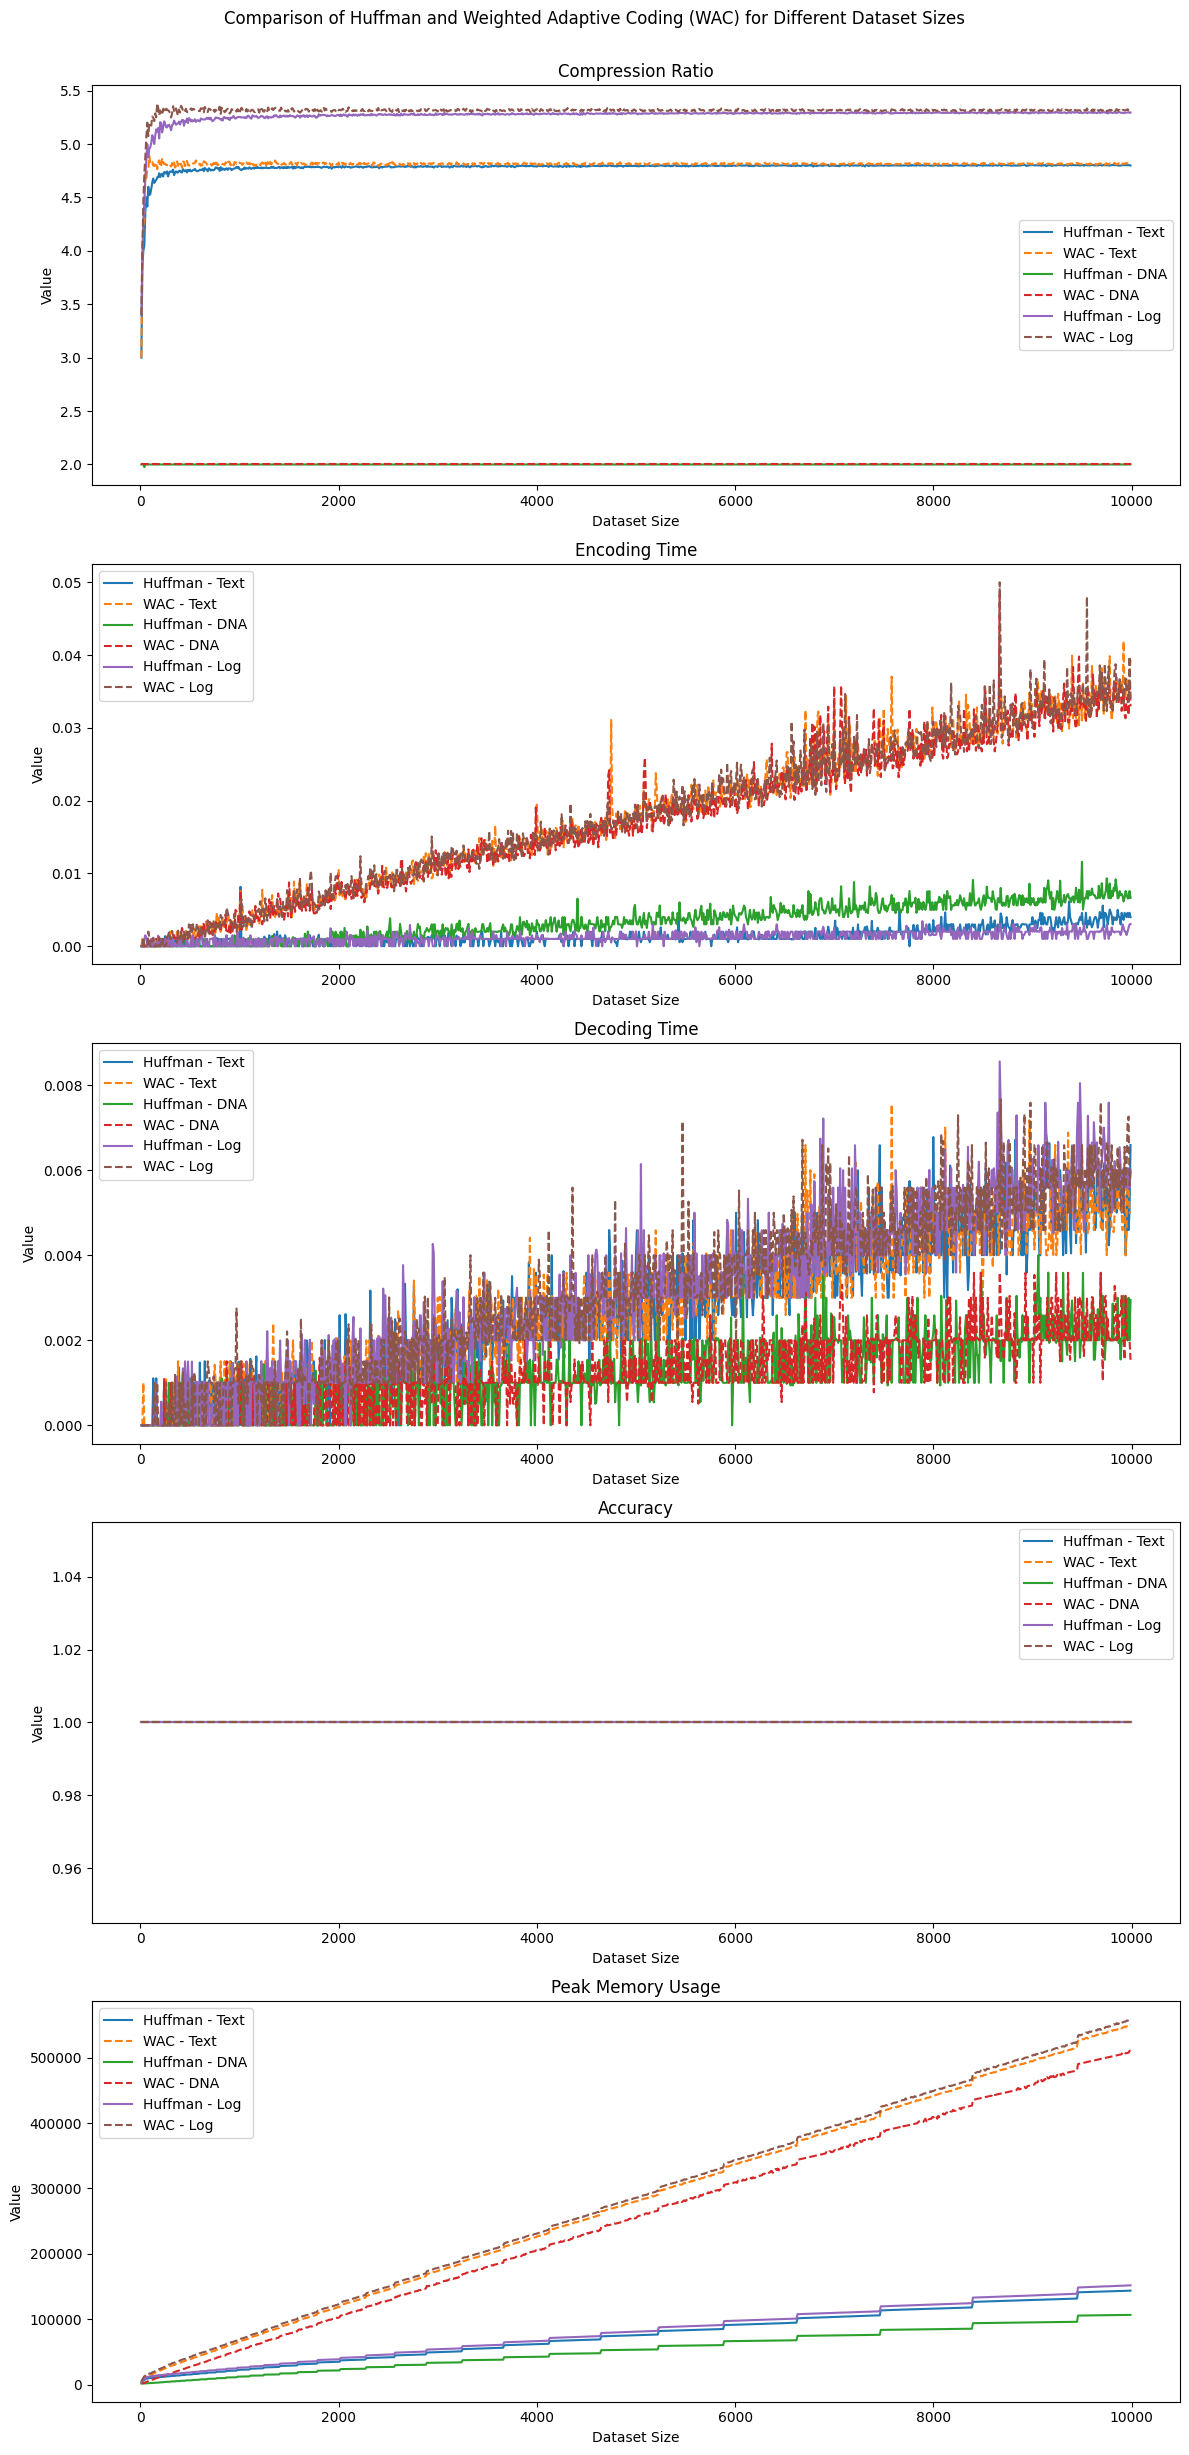

,Dataset Size,Dataset Type,Huffman Compression Ratio,Huffman Encoding Time,Huffman Decoding Time,Huffman Accuracy,Huffman Memory Usage,WAC Compression Ratio,WAC Encoding Time,WAC Decoding Time,WAC Accuracy,WAC Memory Usage
0,10,Text,3.000000,0.000000,0.000000,True,3233,3.000000,0.000000,0.000000,True,4392
1,10,DNA,2.000000,0.000000,0.000000,True,1772,2.000000,0.000000,0.000000,True,2172
2,10,Log,3.400000,0.000000,0.000000,True,3572,3.400000,0.000000,0.000000,True,5044
3,20,Text,3.850000,0.000000,0.000000,True,5331,3.900000,0.001001,0.000000,True,7290
4,20,DNA,2.000000,0.000000,0.000000,True,1676,2.000000,0.000000,0.000000,True,2116
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,9980,DNA,2.000000,0.007591,0.002000,True,106637,2.000000,0.036472,0.002000,True,510497
2993,9980,Log,5.291683,0.003000,0.005590,True,151620,5.317134,0.039806,0.005649,True,558230
2994,9990,Text,4.798599,0.003999,0.006590,True,143656,4.818619,0.039326,0.005001,True,549924
2995,9990,DNA,2.000000,0.006642,0.002949,True,106657,2.000000,0.032950,0.001541,True,510837


In [4]:
import tracemalloc
# Function to run experiments on datasets of different sizes
def run_experiments(sizes):
    datasets = generate_datasets(sizes)
    results = []

    for size, data_dict in datasets.items():
        for name, data in data_dict.items():
            # Huffman encoding
            tracemalloc.start()
            start_time = time.time()
            huffman_encoded_data, huffman_codebook = huffman_encoding(data)
            huffman_encoding_time = time.time() - start_time
            huffman_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            # Huffman decoding (for verification)
            start_time = time.time()
            huffman_decoded_data = huffman_decoding(huffman_encoded_data, huffman_codebook)
            huffman_decoding_time = time.time() - start_time
            huffman_accuracy = huffman_decoded_data == data

            # WAC encoding
            tracemalloc.start()
            start_time = time.time()
            wac_encoded_data, wac_codebook = weighted_adaptive_coding(data)
            wac_encoding_time = time.time() - start_time
            wac_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            # WAC decoding (for verification)
            start_time = time.time()
            wac_decoded_data = wac_decoding(wac_encoded_data, wac_codebook)
            wac_decoding_time = time.time() - start_time
            wac_accuracy = wac_decoded_data == data

            # Record results
            results.append({
                "Dataset Size": size,
                "Dataset Type": name,
                "Huffman Compression Ratio": len(huffman_encoded_data) / len(data),
                "Huffman Encoding Time": huffman_encoding_time,
                "Huffman Decoding Time": huffman_decoding_time,
                "Huffman Accuracy": huffman_accuracy,
                "Huffman Memory Usage": huffman_memory,
                "WAC Compression Ratio": len(wac_encoded_data) / len(data),
                "WAC Encoding Time": wac_encoding_time,
                "WAC Decoding Time": wac_decoding_time,
                "WAC Accuracy": wac_accuracy,
                "WAC Memory Usage": wac_memory
            })

    return results

# Define dataset sizes for testing
#sizes = [100, 500, 1000, 5000, 10000, 100000, 1000000]
sizes = [i for i in range(10, 10000, 10)]

# Run experiments and collect results
results = run_experiments(sizes)

# Convert results to DataFrame
df = pd.DataFrame(results)
print(df)

# Plotting the results
fig, axes = plt.subplots(5, 1, figsize=(12, 25))
fig.suptitle('Comparison of Huffman and Weighted Adaptive Coding (WAC) for Different Dataset Sizes')

# Compression Ratios
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[0].plot(subset['Dataset Size'], subset['Huffman Compression Ratio'], label=f'Huffman - {dataset_type}')
    axes[0].plot(subset['Dataset Size'], subset['WAC Compression Ratio'], label=f'WAC - {dataset_type}', linestyle='--')
axes[0].set_title('Compression Ratio')
axes[0].legend()

# Encoding Times
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[1].plot(subset['Dataset Size'], subset['Huffman Encoding Time'], label=f'Huffman - {dataset_type}')
    axes[1].plot(subset['Dataset Size'], subset['WAC Encoding Time'], label=f'WAC - {dataset_type}', linestyle='--')
axes[1].set_title('Encoding Time')
axes[1].legend()

# Decoding Times
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[2].plot(subset['Dataset Size'], subset['Huffman Decoding Time'], label=f'Huffman - {dataset_type}')
    axes[2].plot(subset['Dataset Size'], subset['WAC Decoding Time'], label=f'WAC - {dataset_type}', linestyle='--')
axes[2].set_title('Decoding Time')
axes[2].legend()

# Accuracy
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[3].plot(subset['Dataset Size'], subset['Huffman Accuracy'], label=f'Huffman - {dataset_type}')
    axes[3].plot(subset['Dataset Size'], subset['WAC Accuracy'], label=f'WAC - {dataset_type}', linestyle='--')
axes[3].set_title('Accuracy')
axes[3].legend()

# Memory Usage
for dataset_type in df['Dataset Type'].unique():
    subset = df[df['Dataset Type'] == dataset_type]
    axes[4].plot(subset['Dataset Size'], subset['Huffman Memory Usage'], label=f'Huffman - {dataset_type}')
    axes[4].plot(subset['Dataset Size'], subset['WAC Memory Usage'], label=f'WAC - {dataset_type}', linestyle='--')
axes[4].set_title('Peak Memory Usage')
axes[4].legend()

# Set common labels
for ax in axes.flat:
    ax.set_xlabel('Dataset Size')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

df


      Dataset Size Dataset Type  Huffman Compression Ratio  \
0               10         Text                   3.000000   
1               10          DNA                   2.000000   
2               10          Log                   3.400000   
3               20         Text                   3.850000   
4               20          DNA                   2.000000   
...            ...          ...                        ...   
2992          9980          DNA                   2.000000   
2993          9980          Log                   5.291683   
2994          9990         Text                   4.798599   
2995          9990          DNA                   2.000000   
2996          9990          Log                   5.295295   

      Huffman Encoding Time  Huffman Decoding Time  Huffman Accuracy  \
0                  0.000000               0.000000              True   
1                  0.000000               0.000000              True   
2                  0.000000            

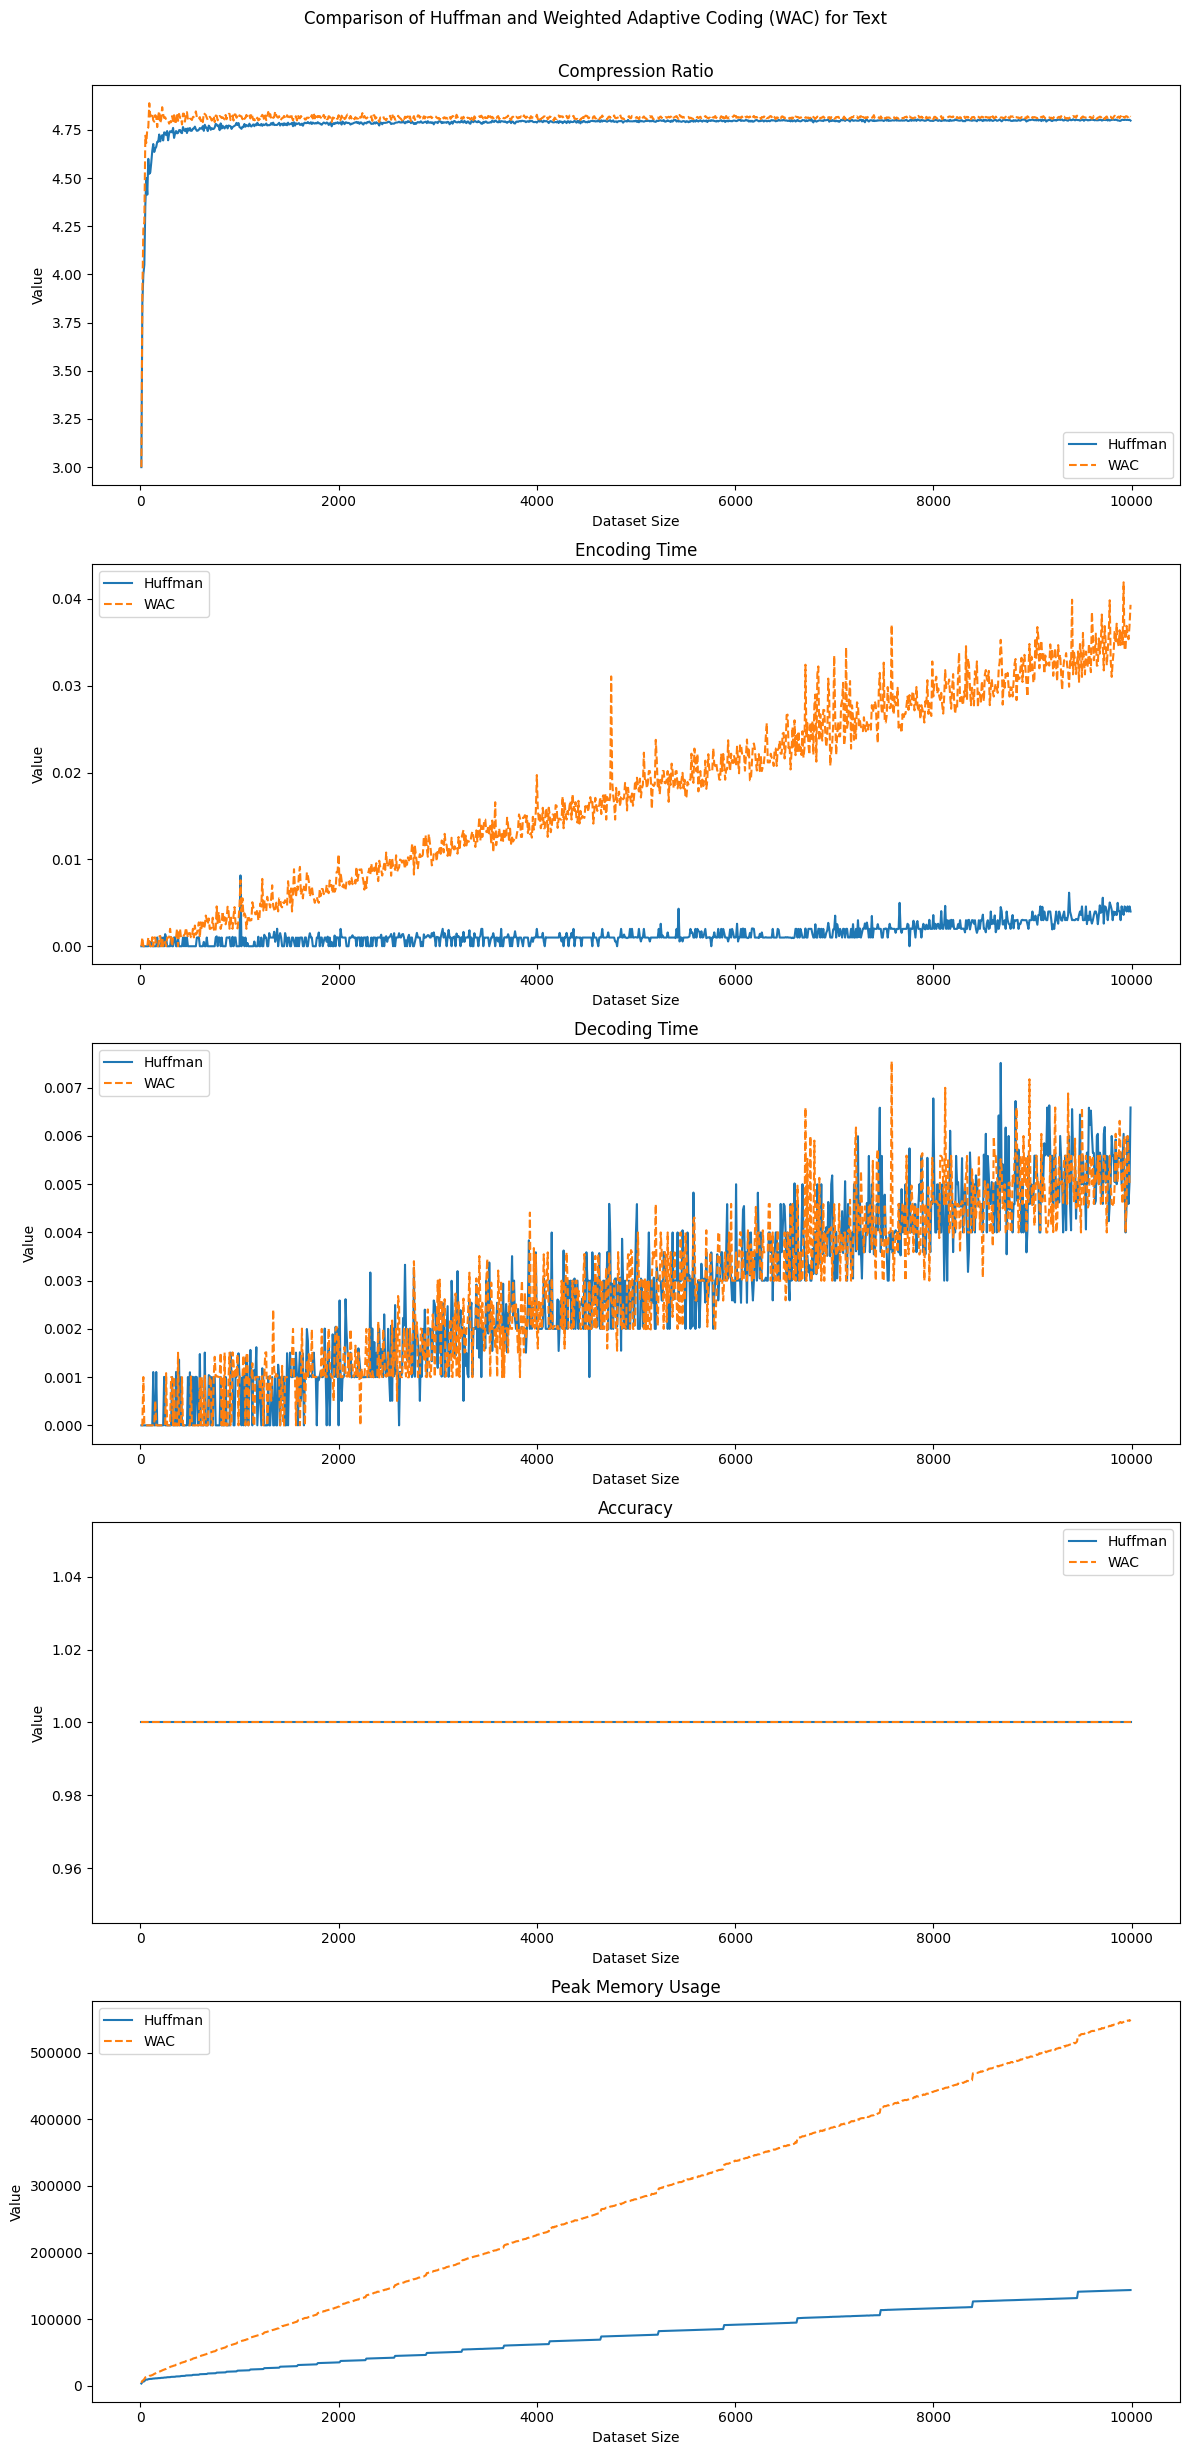

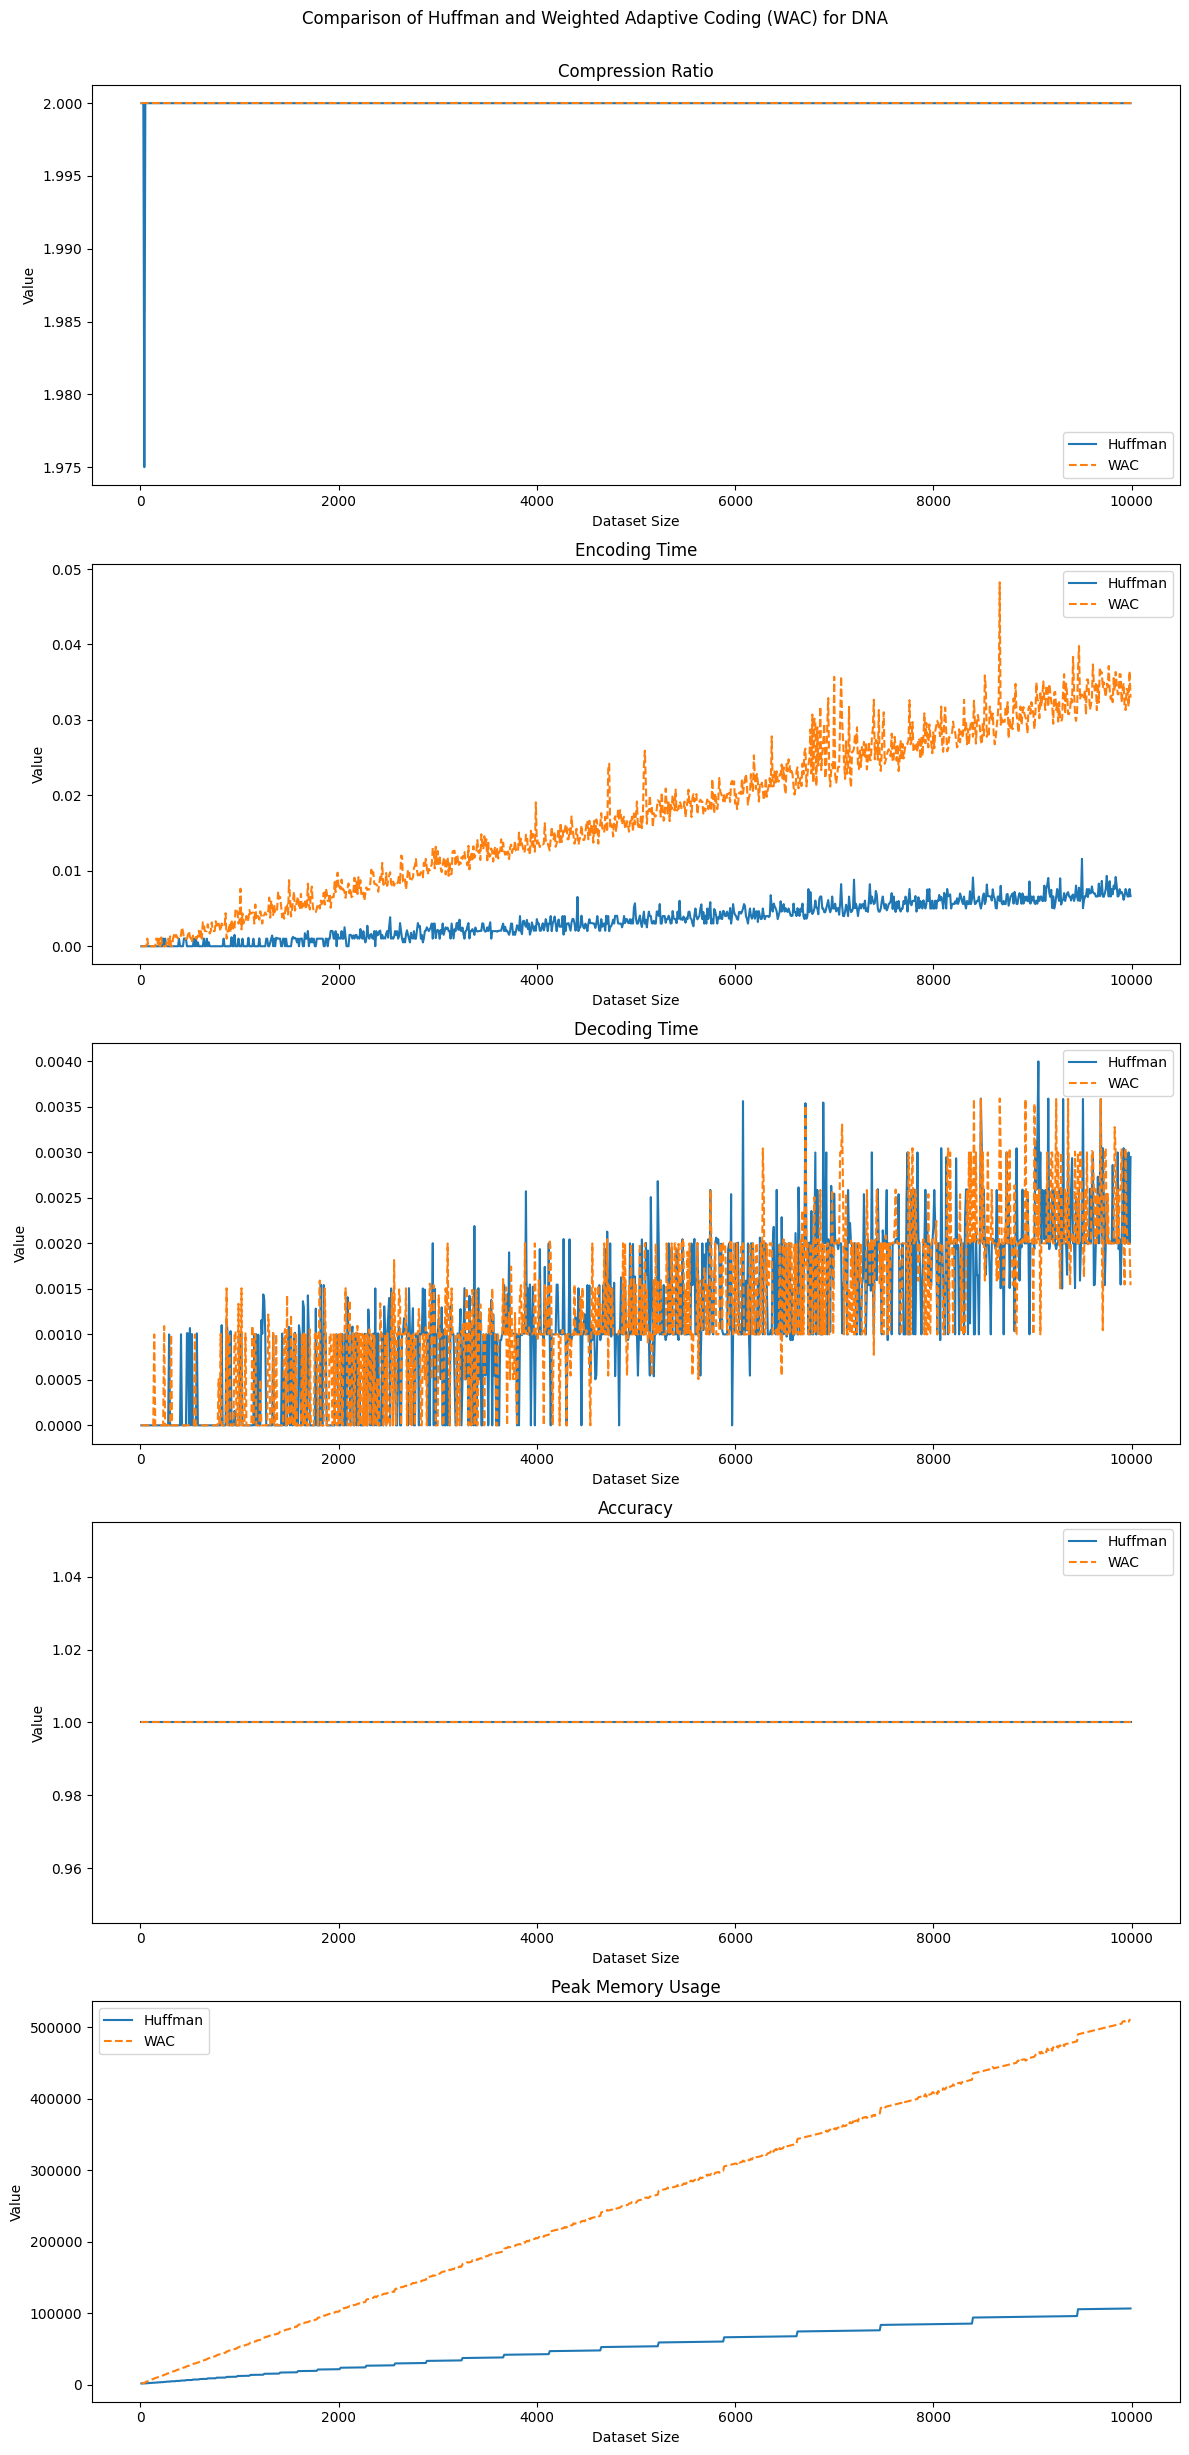

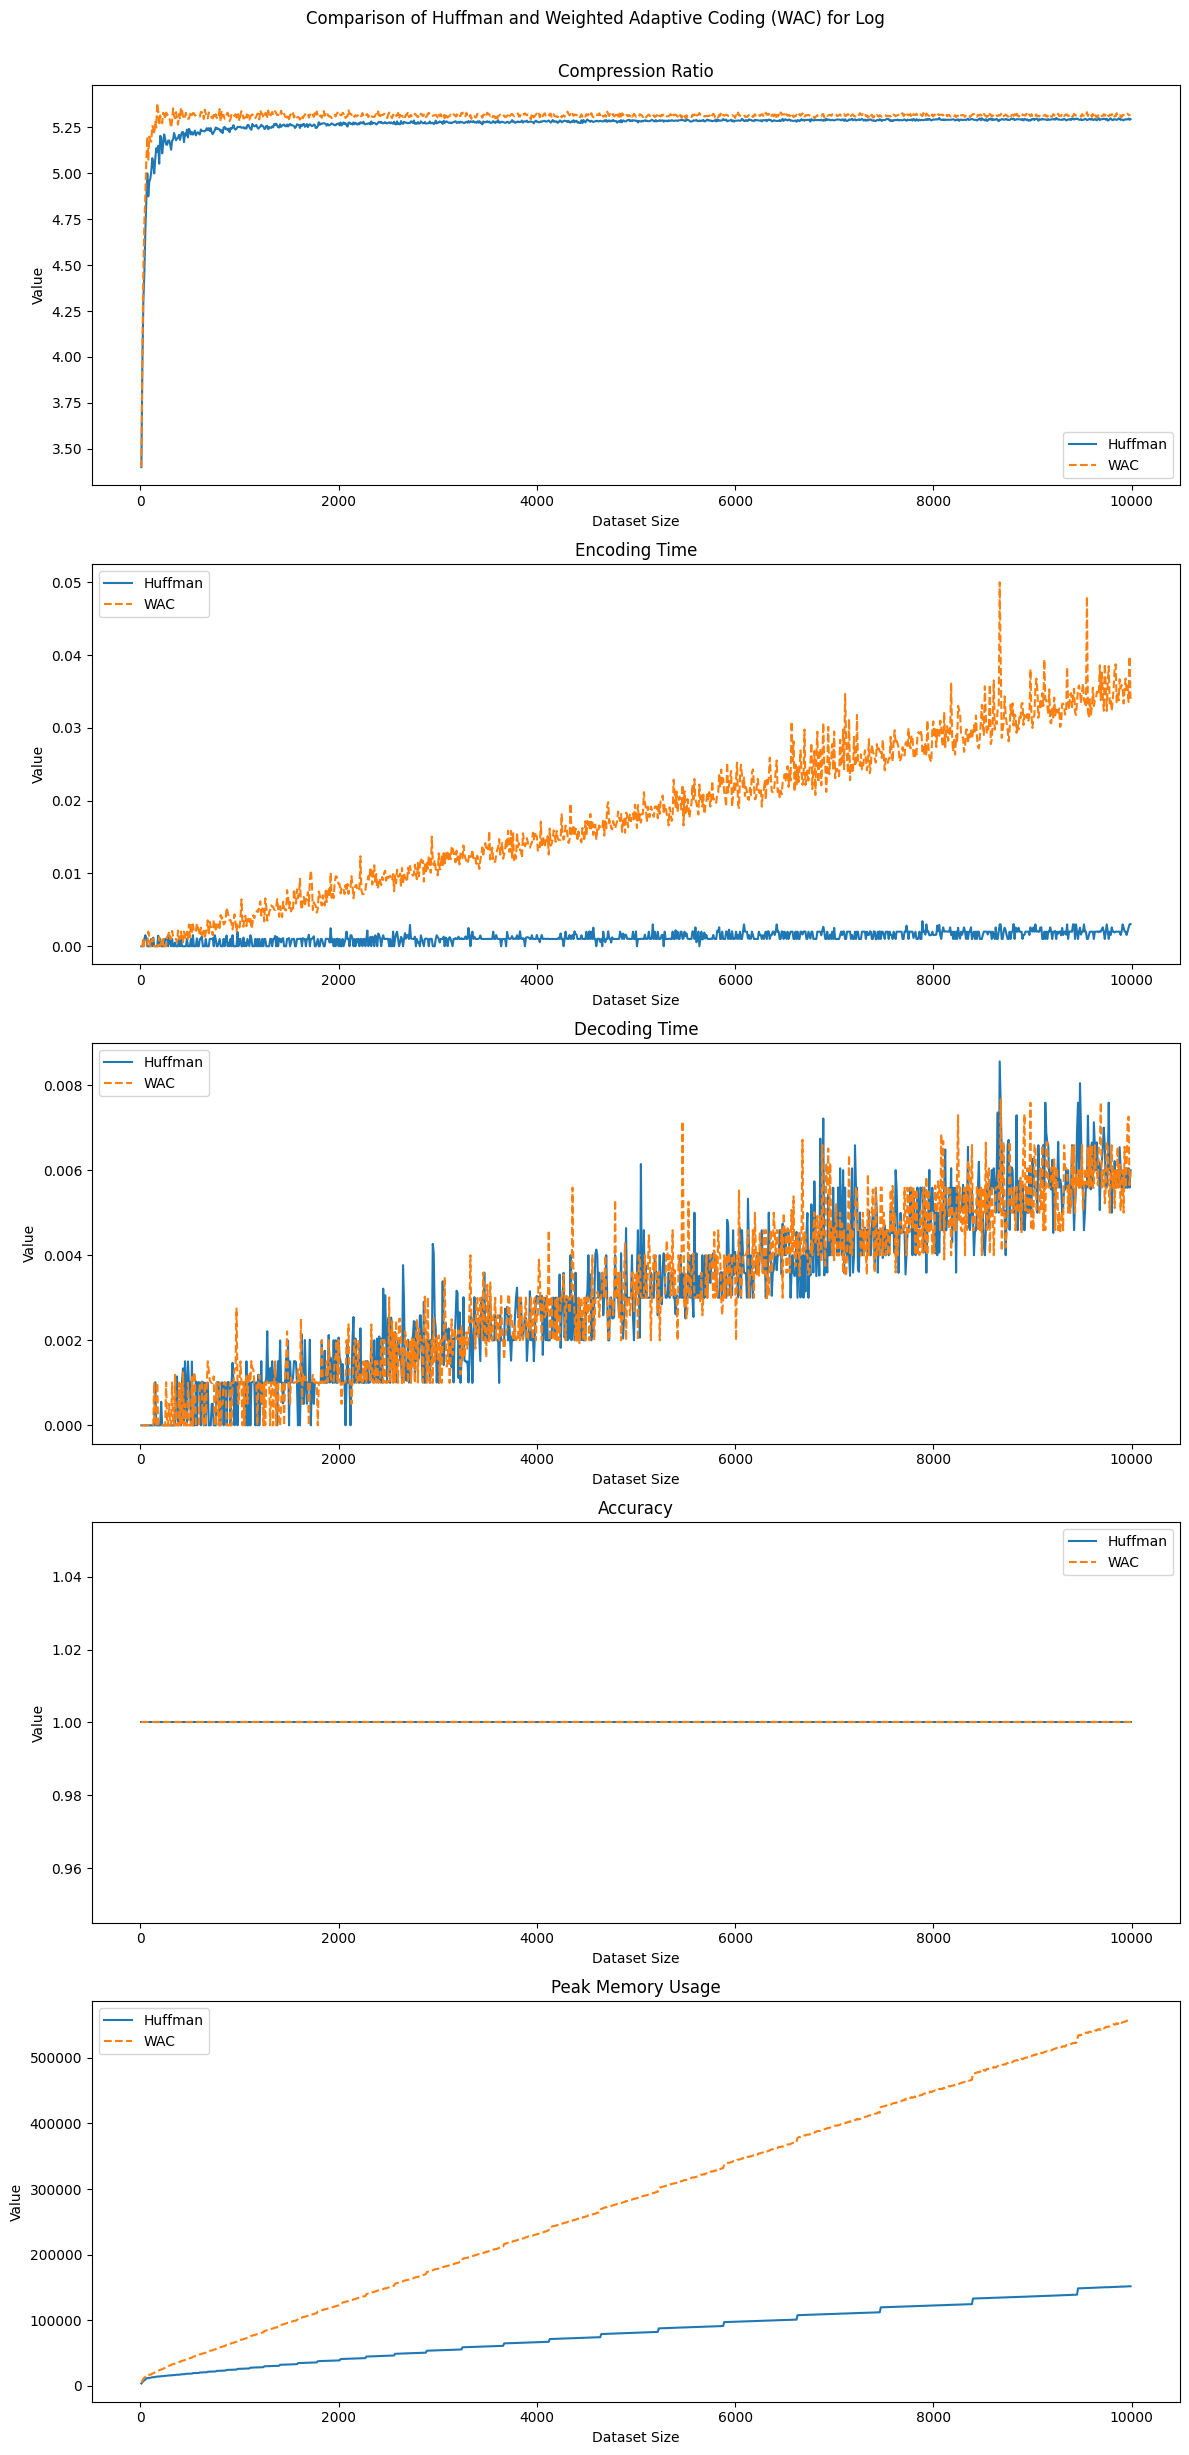

In [5]:
# Convert results to DataFrame
df = pd.DataFrame(results)
print(df)

# Function to plot results for a specific dataset type
def plot_results_for_type(df, dataset_type):
    subset = df[df['Dataset Type'] == dataset_type]
    
    fig, axes = plt.subplots(5, 1, figsize=(12, 25))
    fig.suptitle(f'Comparison of Huffman and Weighted Adaptive Coding (WAC) for {dataset_type}')

    # Compression Ratios
    axes[0].plot(subset['Dataset Size'], subset['Huffman Compression Ratio'], label='Huffman')
    axes[0].plot(subset['Dataset Size'], subset['WAC Compression Ratio'], label='WAC', linestyle='--')
    axes[0].set_title('Compression Ratio')
    axes[0].legend()

    # Encoding Times
    axes[1].plot(subset['Dataset Size'], subset['Huffman Encoding Time'], label='Huffman')
    axes[1].plot(subset['Dataset Size'], subset['WAC Encoding Time'], label='WAC', linestyle='--')
    axes[1].set_title('Encoding Time')
    axes[1].legend()

    # Decoding Times
    axes[2].plot(subset['Dataset Size'], subset['Huffman Decoding Time'], label='Huffman')
    axes[2].plot(subset['Dataset Size'], subset['WAC Decoding Time'], label='WAC', linestyle='--')
    axes[2].set_title('Decoding Time')
    axes[2].legend()

    # Accuracy
    axes[3].plot(subset['Dataset Size'], subset['Huffman Accuracy'], label='Huffman')
    axes[3].plot(subset['Dataset Size'], subset['WAC Accuracy'], label='WAC', linestyle='--')
    axes[3].set_title('Accuracy')
    axes[3].legend()

    # Memory Usage
    axes[4].plot(subset['Dataset Size'], subset['Huffman Memory Usage'], label='Huffman')
    axes[4].plot(subset['Dataset Size'], subset['WAC Memory Usage'], label='WAC', linestyle='--')
    axes[4].set_title('Peak Memory Usage')
    axes[4].legend()

    # Set common labels
    for ax in axes.flat:
        ax.set_xlabel('Dataset Size')
        ax.set_ylabel('Value')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot results for each dataset type
for dataset_type in df['Dataset Type'].unique():
    plot_results_for_type(df, dataset_type)
